# **Projet Gouv Immo**

Dans ce Notebook, je detaillerai la reflexion que j'ai eu dans le tri des données pour gérer les valeurs manquantes et prendre les variables utiles à la suite du projet.

## I- Récupération des données

1. récupération du fichier .csv.gz sur le site
[du gouvernement](https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres-geolocalisees/#/community-reuses)

2. premier affichage



In [2]:
import pandas as pd
import gzip

In [3]:

# Nom du fichier .csv.gz
fichier_gz = r'../data/full2022.csv.gz'

# Décompression et lecture du fichier CSV avec Pandas
with gzip.open(fichier_gz, 'rt') as f:
    dataframe = pd.read_csv(f)

dataframe.head()  # Afficher les premières lignes du dataframe


C:\Users\julie\AppData\Local\Temp\ipykernel_17616\2195430131.py:6: DtypeWarning: Columns (10,12,14,16,17,18,20,22,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv(f)


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2022-1,2022-01-03,1,Vente,55000.0,13.0,NaN,RUE DE LA LIBERTE,2280,1000.0,...,Appartement,24.0,1.0,NaN,NaN,NaN,NaN,NaN,5.218706,46.198054
1,2022-2,2022-01-03,1,Vente,143000.0,NaN,NaN,CHAMP COCHET,B010,1480.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,84.0,4.847867,46.000617
2,2022-2,2022-01-03,1,Vente,143000.0,NaN,NaN,CHAMP COCHET,B010,1480.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,88.0,4.847920,46.000576
3,2022-2,2022-01-03,1,Vente,143000.0,98.0,NaN,RTE DE LA DOMBES,0055,1480.0,...,Appartement,140.0,3.0,NaN,NaN,NaN,NaN,NaN,4.848345,46.000585
4,2022-3,2022-01-04,1,Vente,300.0,NaN,NaN,AUX PIERRES,B031,1480.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,510.0,4.747627,46.045434


3. Taille du dataframe

In [4]:
print('Taille du Dataframe:', dataframe.shape)

Taille du Dataframe: (3803885, 40)


4. Informations du dataframe et type des variables

In [5]:
print('Détail du Dataframe', dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803885 entries, 0 to 3803884
Data columns (total 40 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id_mutation                   object 
 1   date_mutation                 object 
 2   numero_disposition            int64  
 3   nature_mutation               object 
 4   valeur_fonciere               float64
 5   adresse_numero                float64
 6   adresse_suffixe               object 
 7   adresse_nom_voie              object 
 8   adresse_code_voie             object 
 9   code_postal                   float64
 10  code_commune                  object 
 11  nom_commune                   object 
 12  code_departement              object 
 13  ancien_code_commune           float64
 14  ancien_nom_commune            object 
 15  id_parcelle                   object 
 16  ancien_id_parcelle            object 
 17  numero_volume                 object 
 18  lot1_numero           

5. Nombre de valeurs manquantes

In [6]:
print('Nombre de valeurs manquantes par colonne du Dataframe', dataframe.isna().sum())

Nombre de valeurs manquantes par colonne du Dataframe id_mutation                           0
date_mutation                         0
numero_disposition                    0
nature_mutation                       0
valeur_fonciere                   24721
adresse_numero                  1321227
adresse_suffixe                 3627918
adresse_nom_voie                  39153
adresse_code_voie                 39043
code_postal                       39173
code_commune                          0
nom_commune                           0
code_departement                      0
ancien_code_commune             3803862
ancien_nom_commune              3803862
id_parcelle                           0
ancien_id_parcelle              3803884
numero_volume                   3794976
lot1_numero                     2534572
lot1_surface_carrez             3436147
lot2_numero                     3405819
lot2_surface_carrez             3679945
lot3_numero                     3732930
lot3_surface_carrez       

6. Proportion de valeurs manquantes

In [7]:
print('Proportion de valeurs manquantes par colonne du Dataframe', dataframe.isna().sum()/dataframe.shape[0])

Proportion de valeurs manquantes par colonne du Dataframe id_mutation                     0.000000
date_mutation                   0.000000
numero_disposition              0.000000
nature_mutation                 0.000000
valeur_fonciere                 0.006499
adresse_numero                  0.347336
adresse_suffixe                 0.953740
adresse_nom_voie                0.010293
adresse_code_voie               0.010264
code_postal                     0.010298
code_commune                    0.000000
nom_commune                     0.000000
code_departement                0.000000
ancien_code_commune             0.999994
ancien_nom_commune              0.999994
id_parcelle                     0.000000
ancien_id_parcelle              1.000000
numero_volume                   0.997658
lot1_numero                     0.666311
lot1_surface_carrez             0.903326
lot2_numero                     0.895353
lot2_surface_carrez             0.967418
lot3_numero                     0.981347

## II- Création du nouveau dataframe et gestion des valeurs manquantes

J'ai créé une colonne de booléen 'mutation', qui retourne True si le bien fait parti d'une même mutation qu'un autre bien

In [8]:
df = dataframe[['id_mutation','date_mutation','nature_mutation',
               'valeur_fonciere','code_commune','nom_commune','code_departement',
               'id_parcelle','code_type_local','type_local','surface_reelle_bati',
               'nombre_pieces_principales','code_nature_culture','nature_culture',
               'code_nature_culture_speciale','nature_culture_speciale','surface_terrain',
               'longitude','latitude']]

df['mutation'] = df['id_mutation'].duplicated(keep=False)

df.head()

C:\Users\julie\AppData\Local\Temp\ipykernel_17616\847086977.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mutation'] = df['id_mutation'].duplicated(keep=False)


,id_mutation,date_mutation,nature_mutation,valeur_fonciere,code_commune,nom_commune,code_departement,id_parcelle,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,mutation
0,2022-1,2022-01-03,Vente,55000.0,1053,Bourg-en-Bresse,1,01053000AM0102,2.0,Appartement,24.0,1.0,NaN,NaN,NaN,NaN,NaN,5.218706,46.198054,False
1,2022-2,2022-01-03,Vente,143000.0,1398,Savigneux,1,01398000ZE0184,NaN,NaN,NaN,NaN,S,sols,NaN,NaN,84.0,4.847867,46.000617,True
2,2022-2,2022-01-03,Vente,143000.0,1398,Savigneux,1,01398000ZE0185,NaN,NaN,NaN,NaN,S,sols,NaN,NaN,88.0,4.847920,46.000576,True
3,2022-2,2022-01-03,Vente,143000.0,1398,Savigneux,1,01398000ZE0187,2.0,Appartement,140.0,3.0,NaN,NaN,NaN,NaN,NaN,4.848345,46.000585,True
4,2022-3,2022-01-04,Vente,300.0,1243,Messimy-sur-SaÃ´ne,1,012430000A0643,NaN,NaN,NaN,NaN,T,terres,NaN,NaN,510.0,4.747627,46.045434,False


1. Rappel des proportions de valeurs manquantes par colonne

In [9]:
print('Proportion de valeurs manquantes par colonne du Dataframe', df.isna().sum()/df.shape[0])

Proportion de valeurs manquantes par colonne du Dataframe id_mutation                     0.000000
date_mutation                   0.000000
nature_mutation                 0.000000
valeur_fonciere                 0.006499
code_commune                    0.000000
nom_commune                     0.000000
code_departement                0.000000
id_parcelle                     0.000000
code_type_local                 0.399185
type_local                      0.399185
surface_reelle_bati             0.665583
nombre_pieces_principales       0.399734
code_nature_culture             0.338309
nature_culture                  0.338309
code_nature_culture_speciale    0.959343
nature_culture_speciale         0.959343
surface_terrain                 0.338326
longitude                       0.013641
latitude                        0.013641
mutation                        0.000000
dtype: float64


2. Suppression des valeurs dont la valeur_foncière est inconnue

In [10]:
df = df.dropna(axis = 0, subset = 'valeur_fonciere')

3. Rappel des proportions de valeurs manquantes par colonne

In [11]:
print('Proportion de valeurs manquantes par colonne du Dataframe', df.isna().sum()/df.shape[0])

Proportion de valeurs manquantes par colonne du Dataframe id_mutation                     0.000000
date_mutation                   0.000000
nature_mutation                 0.000000
valeur_fonciere                 0.000000
code_commune                    0.000000
nom_commune                     0.000000
code_departement                0.000000
id_parcelle                     0.000000
code_type_local                 0.396855
type_local                      0.396855
surface_reelle_bati             0.664325
nombre_pieces_principales       0.397371
code_nature_culture             0.340281
nature_culture                  0.340281
code_nature_culture_speciale    0.959946
nature_culture_speciale         0.959946
surface_terrain                 0.340296
longitude                       0.013579
latitude                        0.013579
mutation                        0.000000
dtype: float64


4. Remplacement des valeurs manquantes dans les colonnes 'code_type_local','surface_reelle_bati','nombre_pieces_principales' par 0 quand le bien fait parti d'une mutation déja existante ou si il existe une surface de culture ou de culture spéciale

Même chose pour la colonne 'type_local' dans les valeurs manquantes sont remplacées par 'Vide'



In [12]:
condition = (df['code_nature_culture'].notna())|(df['code_nature_culture_speciale'].notna()|df['mutation'])

df.loc[condition, ['code_type_local','surface_reelle_bati','nombre_pieces_principales']] = df.loc[condition, ['code_type_local','surface_reelle_bati','nombre_pieces_principales']].fillna(0)
df.loc[condition, ['type_local']] = df.loc[condition, ['type_local']].fillna('Vide')

In [13]:
df.head()

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,code_commune,nom_commune,code_departement,id_parcelle,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,mutation
0,2022-1,2022-01-03,Vente,55000.0,1053,Bourg-en-Bresse,1,01053000AM0102,2.0,Appartement,24.0,1.0,NaN,NaN,NaN,NaN,NaN,5.218706,46.198054,False
1,2022-2,2022-01-03,Vente,143000.0,1398,Savigneux,1,01398000ZE0184,0.0,Vide,0.0,0.0,S,sols,NaN,NaN,84.0,4.847867,46.000617,True
2,2022-2,2022-01-03,Vente,143000.0,1398,Savigneux,1,01398000ZE0185,0.0,Vide,0.0,0.0,S,sols,NaN,NaN,88.0,4.847920,46.000576,True
3,2022-2,2022-01-03,Vente,143000.0,1398,Savigneux,1,01398000ZE0187,2.0,Appartement,140.0,3.0,NaN,NaN,NaN,NaN,NaN,4.848345,46.000585,True
4,2022-3,2022-01-04,Vente,300.0,1243,Messimy-sur-SaÃ´ne,1,012430000A0643,0.0,Vide,0.0,0.0,T,terres,NaN,NaN,510.0,4.747627,46.045434,False


5. Rappel des proportions de valeurs manquantes par colonne

In [14]:
print('Proportion de valeurs manquantes par colonne du Dataframe', df.isna().sum()/df.shape[0])

Proportion de valeurs manquantes par colonne du Dataframe id_mutation                     0.000000
date_mutation                   0.000000
nature_mutation                 0.000000
valeur_fonciere                 0.000000
code_commune                    0.000000
nom_commune                     0.000000
code_departement                0.000000
id_parcelle                     0.000000
code_type_local                 0.004764
type_local                      0.004764
surface_reelle_bati             0.014067
nombre_pieces_principales       0.004767
code_nature_culture             0.340281
nature_culture                  0.340281
code_nature_culture_speciale    0.959946
nature_culture_speciale         0.959946
surface_terrain                 0.340296
longitude                       0.013579
latitude                        0.013579
mutation                        0.000000
dtype: float64


6. Remplacement des valeurs manquantes dans les colonnes 'code_nature_culture' par 'PDC' quand le bien fait parti d'une mutation déja existante ou si il existe un batiment ou un terrain de culture spéciale

Même chose pour la colonne 'nature_culture' dans les valeurs manquantes sont remplacées par 'pas de cultures'

In [15]:
condition = (df['code_nature_culture_speciale'].notna())|(df['code_type_local'].notna()|df['mutation'])

df.loc[condition, ['code_nature_culture']] = df.loc[condition, ['code_nature_culture']].fillna('PDC')
df.loc[condition, ['nature_culture']] = df.loc[condition, ['nature_culture']].fillna('pas de cultures')

In [16]:
print('Proportion de valeurs manquantes par colonne du Dataframe', df.isna().sum()/df.shape[0])

Proportion de valeurs manquantes par colonne du Dataframe id_mutation                     0.000000
date_mutation                   0.000000
nature_mutation                 0.000000
valeur_fonciere                 0.000000
code_commune                    0.000000
nom_commune                     0.000000
code_departement                0.000000
id_parcelle                     0.000000
code_type_local                 0.004764
type_local                      0.004764
surface_reelle_bati             0.014067
nombre_pieces_principales       0.004767
code_nature_culture             0.004764
nature_culture                  0.004764
code_nature_culture_speciale    0.959946
nature_culture_speciale         0.959946
surface_terrain                 0.340296
longitude                       0.013579
latitude                        0.013579
mutation                        0.000000
dtype: float64


7. Remplacement des valeurs manquantes dans les colonnes 'code_nature_culture_speciale' par 'PDCS' quand le bien fait parti d'une mutation déja existante ou si il existe un batiment ou un terrain de culture

Même chose pour la colonne 'nature_culture_spéciale' dans les valeurs manquantes sont remplacées par 'Pas de Cultures Spé'

In [17]:
condition = (df['code_nature_culture'].notna())|(df['code_type_local'].notna()|df['mutation'])

df.loc[condition, ['code_nature_culture_speciale']] = df.loc[condition, ['code_nature_culture_speciale']].fillna('PDCS')
df.loc[condition, ['nature_culture_speciale']] = df.loc[condition, ['nature_culture_speciale']].fillna('Pas de Cultures Spé')

In [18]:
print('Proportion de valeurs manquantes par colonne du Dataframe', df.isna().sum()/df.shape[0])

Proportion de valeurs manquantes par colonne du Dataframe id_mutation                     0.000000
date_mutation                   0.000000
nature_mutation                 0.000000
valeur_fonciere                 0.000000
code_commune                    0.000000
nom_commune                     0.000000
code_departement                0.000000
id_parcelle                     0.000000
code_type_local                 0.004764
type_local                      0.004764
surface_reelle_bati             0.014067
nombre_pieces_principales       0.004767
code_nature_culture             0.004764
nature_culture                  0.004764
code_nature_culture_speciale    0.004764
nature_culture_speciale         0.004764
surface_terrain                 0.340296
longitude                       0.013579
latitude                        0.013579
mutation                        0.000000
dtype: float64


8. Remplacement des valeurs manquantes dans les colonnes 'surface_terrain' par 0 quand le bien est un dépendance ou un appartement

In [19]:
df.loc[(df['code_type_local'] == 2)|(df['code_type_local'] == 3)|(df['code_type_local'] == 4), ['surface_terrain']] = df.loc[(df['code_type_local'] == 2)|(df['code_type_local'] == 3)|(df['code_type_local'] == 4), ['surface_terrain']].fillna(0)

In [20]:
print('Proportion de valeurs manquantes par colonne du Dataframe', df.isna().sum()/df.shape[0])

Proportion de valeurs manquantes par colonne du Dataframe id_mutation                     0.000000
date_mutation                   0.000000
nature_mutation                 0.000000
valeur_fonciere                 0.000000
code_commune                    0.000000
nom_commune                     0.000000
code_departement                0.000000
id_parcelle                     0.000000
code_type_local                 0.004764
type_local                      0.004764
surface_reelle_bati             0.014067
nombre_pieces_principales       0.004767
code_nature_culture             0.004764
nature_culture                  0.004764
code_nature_culture_speciale    0.004764
nature_culture_speciale         0.004764
surface_terrain                 0.064485
longitude                       0.013579
latitude                        0.013579
mutation                        0.000000
dtype: float64


9. Suppression des dernières valeurs manquantes



In [21]:
df_final = df.dropna()

10. Taille finale du dataframe et la proportion de valeurs manquantes

In [22]:
df_final.shape

(3455237, 20)

In [23]:
print('Proportion de valeurs manquantes par colonne du Dataframe', df_final.isna().sum()/df_final.shape[0])

Proportion de valeurs manquantes par colonne du Dataframe id_mutation                     0.0
date_mutation                   0.0
nature_mutation                 0.0
valeur_fonciere                 0.0
code_commune                    0.0
nom_commune                     0.0
code_departement                0.0
id_parcelle                     0.0
code_type_local                 0.0
type_local                      0.0
surface_reelle_bati             0.0
nombre_pieces_principales       0.0
code_nature_culture             0.0
nature_culture                  0.0
code_nature_culture_speciale    0.0
nature_culture_speciale         0.0
surface_terrain                 0.0
longitude                       0.0
latitude                        0.0
mutation                        0.0
dtype: float64


11.Réorganisation des département (désolé la Corse 2A et 2B passent à 20)

In [24]:
# Remplacer les valeurs dans la colonne 'code_departement'
replacement_dict = {'29': 29, '30': 30, '2A': 20, '2B': 20}
df_final.loc[:, 'code_departement'] = df_final.loc[:,'code_departement'].replace(replacement_dict)

C:\Users\julie\AppData\Local\Temp\ipykernel_17616\1133506629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[:, 'code_departement'] = df_final.loc[:,'code_departement'].replace(replacement_dict)


In [25]:
df_final = df_final.sort_values(by='code_departement')
df_final['code_departement'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95, 971, 972, 973, 974], dtype=int64)

## III- Statistiques, choix des biens à étudier

1. Affichage de la moyenne du nombre de mutation par acte 

In [26]:
count_identical = df_final['id_mutation'].duplicated(keep=False).sum()


print(f"Nombre de lignes avec des cellules identiques dans 'id_mutation': {count_identical}")

print(f"Nombre de mutation moyenne par acte': {df_final.shape[0]/count_identical}")



Nombre de lignes avec des cellules identiques dans 'id_mutation': 3025456
Nombre de mutation moyenne par acte': 1.1420549497331973


Dans le datframe trié, on a 3 025 456 mutations composées de plusieurs biens (dépendnaces, maisons, appartments, terrain nus, ...) sur 3 455 237. Il faut voir si avoir plusieurs biens dans une mutation pose un problème. 

2. Statistique prix moyen au mètre carrée d'une maison 
- Dans un département

Premiere reflexion sur le prix moyen d'une maison par departement 

In [27]:
prix_moyen_departement = df_final[df_final['code_type_local'] == 1].groupby('code_departement')['valeur_fonciere'].mean()

prix_moyen_departement = pd.DataFrame({'code_departement': prix_moyen_departement.index, 
                                       'prix_moyen': prix_moyen_departement.values})

prix_moyen_departement.shape



(96, 2)

Mettre le prix au mètre carré par département

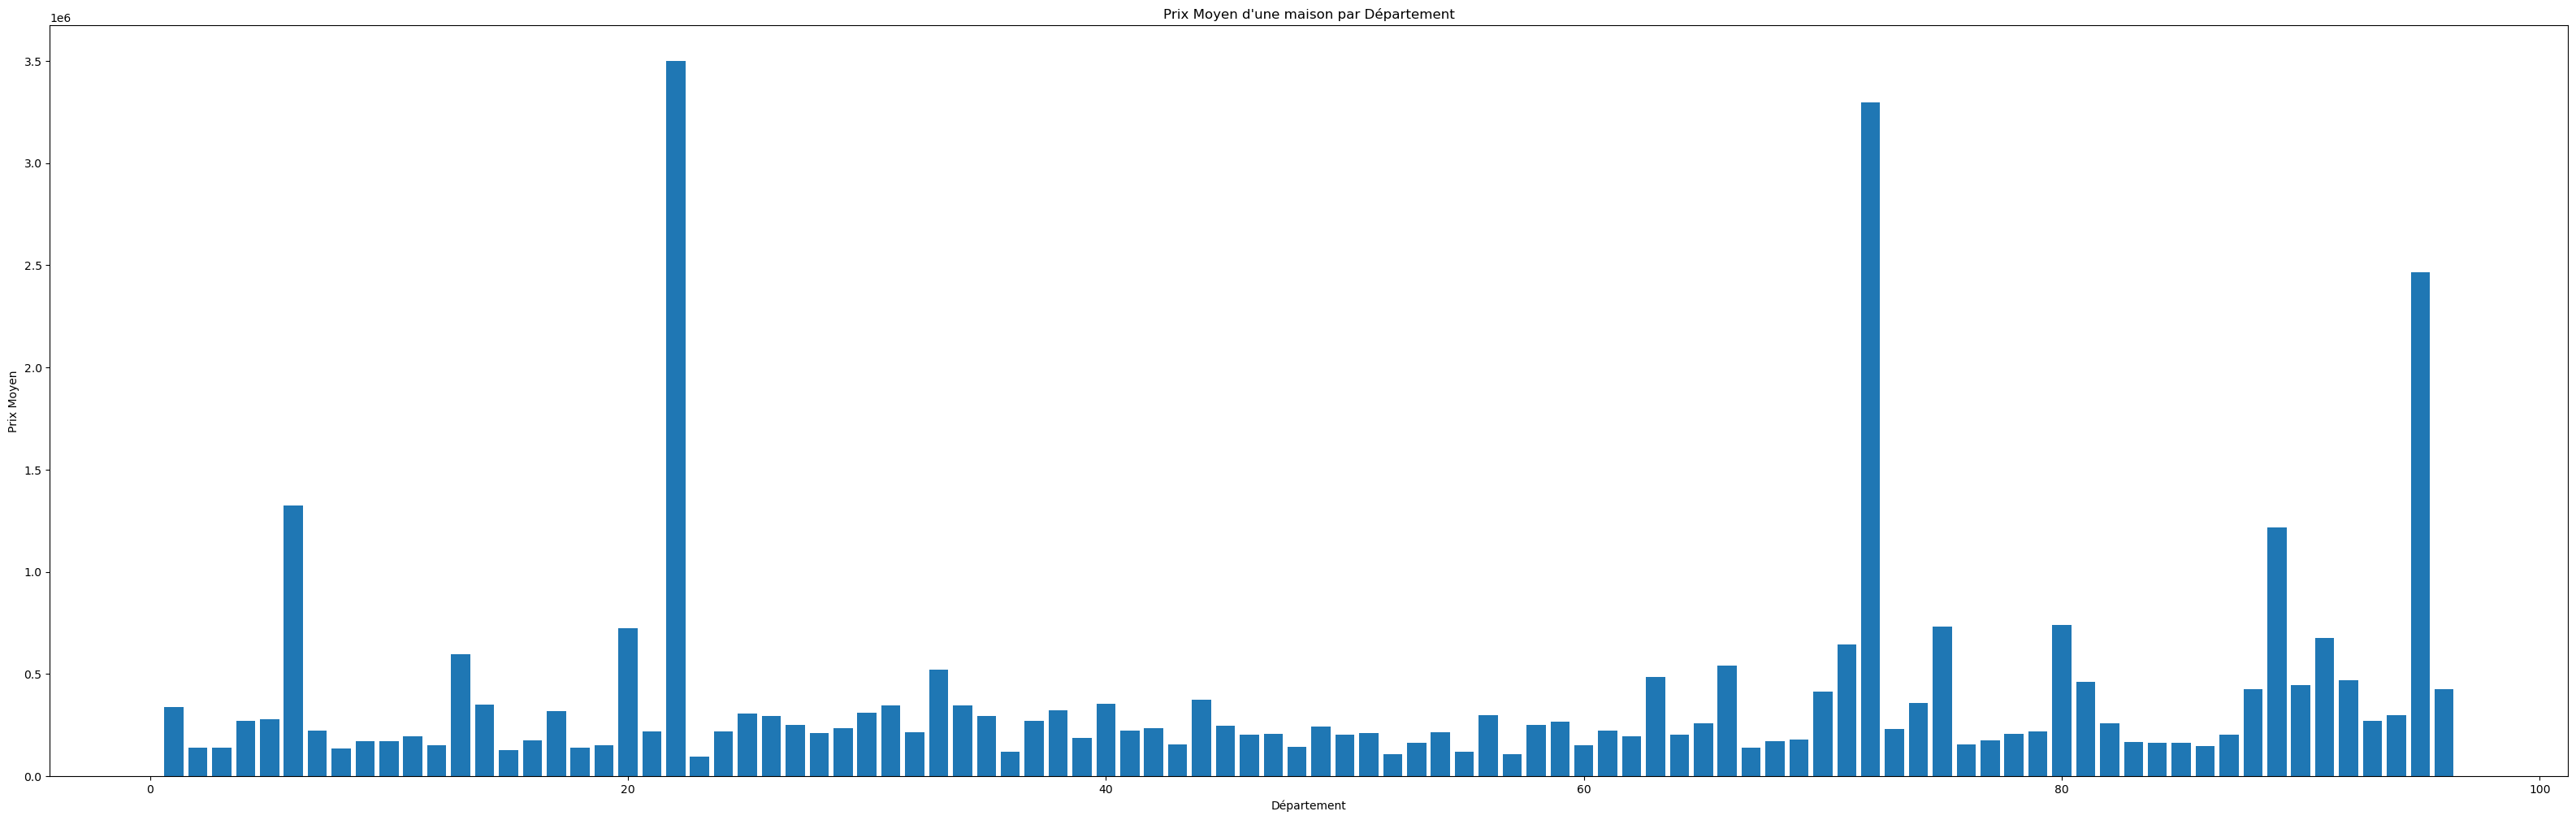

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 12))
# Créer le graphe en barres
plt.bar(x = range(1,97),
        height = prix_moyen_departement['prix_moyen'])

# Personnaliser le graphe
plt.title("Prix Moyen d'une maison par Département")
plt.xlabel('Département')
plt.ylabel('Prix Moyen')

# Afficher le graphe
plt.show()

Dans certains departements, on va avoir une mutation regroupant plusieurs biens qui va chiffrer la valeur foncière très élevée, on a aucune information sur le prix de chaque bien individuellement

---
---
---
---
---
---













La reflexion va se proter sur reduire le dataframe sur les mutations contenant un nombre raisonnable de biens 

In [29]:
indice_ligne_max = df_final['valeur_fonciere'].idxmax()

# Afficher la ligne avec la valeur maximale
ligne_max = df_final.loc[indice_ligne_max]

print("Ligne avec la valeur maximale :")
print(ligne_max)

Ligne avec la valeur maximale :
id_mutation                             2022-775552
date_mutation                            2022-10-28
nature_mutation                               Vente
valeur_fonciere                         722590020.0
code_commune                                  59378
nom_commune                        Marcq-en-BarÅ“ul
code_departement                                 59
id_parcelle                          59378000BE0233
code_type_local                                 3.0
type_local                              DÃ©pendance
surface_reelle_bati                             0.0
nombre_pieces_principales                       0.0
code_nature_culture                               S
nature_culture                                 sols
code_nature_culture_speciale                   PDCS
nature_culture_speciale         Pas de Cultures Spé
surface_terrain                               383.0
longitude                                  3.097764
latitude                        

La ligne avec la plus haute valeur foncière est  722 590 020 € située dans le Nord

In [30]:
df_final.loc[df_final['id_mutation'] == '2022-775552']

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,code_commune,nom_commune,code_departement,id_parcelle,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,mutation
2184164,2022-775552,2022-10-28,Vente,722590020.0,59378,Marcq-en-BarÅ“ul,59,59378000BE0233,3.0,DÃ©pendance,0.0,0.0,S,sols,PDCS,Pas de Cultures Spé,383.0,3.097764,50.662103,True
2184163,2022-775552,2022-10-28,Vente,722590020.0,59378,Marcq-en-BarÅ“ul,59,59378000BE0233,1.0,Maison,119.0,5.0,S,sols,PDCS,Pas de Cultures Spé,383.0,3.097764,50.662103,True


Cette mutation est sur une maison et une dépendance avec un terrain agricole, mais, il n'y pas plus de détails

In [31]:
print("Nombre de mutation dont le prix est supérieur à 100 000 000€ :", len(df_final[df_final['valeur_fonciere'] > 100000000].groupby(['id_mutation']).agg('count')))
df_final[df_final['valeur_fonciere'] > 100000000].groupby(['id_mutation']).agg('count')

Nombre de mutation dont le prix est supérieur à 100 000 000€ : 42


,date_mutation,nature_mutation,valeur_fonciere,code_commune,nom_commune,code_departement,id_parcelle,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,mutation
id_mutation,,,,,,,,,,,,,,,,,,,
2022-1020267,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
2022-1047956,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2022-1063466,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2022-1064419,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66
2022-1213732,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
2022-1242632,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2022-1243905,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2022-1248639,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2022-1249913,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46


On a 42 mutations qui sont au dessus de 100 000 000€ et c'est compliqué de dire ce qui fait le prix de ses mutations. La surface du terrain, le nombre de m² des biens construits, la situation géographique.
Pour se simplifier la tâche dans un premier temps, il serait judicieux de ramner la reflexion sur l'étude des mutations contenant une seul maison ou(exclusif) un seul appartement. 

3- Reflexion pour l'Essonne

On se concentre sur l'Essone pour réduire notre jeu de données. Ma machine n'est pas assez puissante pour gérer toute la France.

In [32]:
df_91 = df_final[df_final.code_departement == 91]
df_91.shape

(49551, 20)

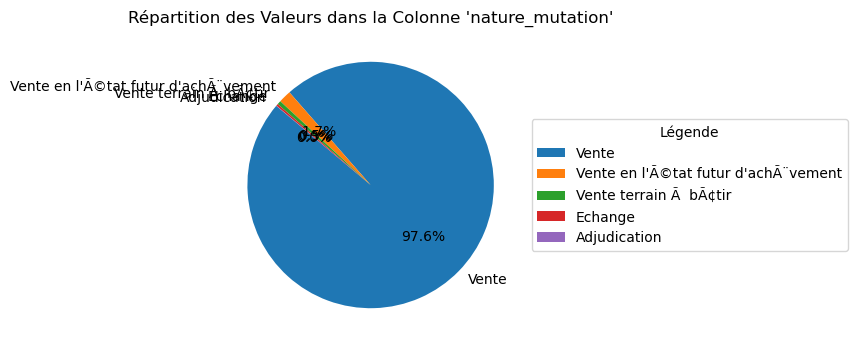

In [33]:
value_counts = df_91['nature_mutation'].value_counts()

# Créez un diagramme circulaire
plt.figure(figsize=(4, 4))  # Facultatif : ajustez la taille du diagramme
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)

# Ajoutez un titre
plt.title("Répartition des Valeurs dans la Colonne 'nature_mutation'")
plt.legend(title="Légende", loc="center left", bbox_to_anchor=(1, 0.5))
# Affichez le diagramme
plt.show()

Reflexion sur la nature de la mutation: La Vente est la nature la plus représentée et la plus pertinente, les autres peuvent fausser les données.

In [34]:
df_91 = df_91[df_91['nature_mutation'] == 'Vente'] 

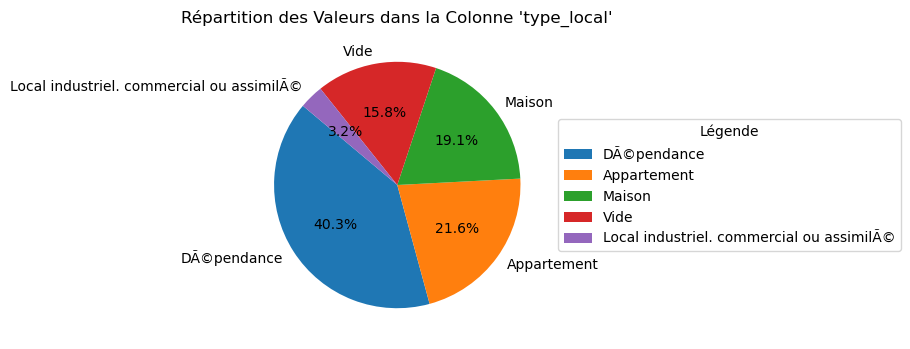

In [35]:
value_counts = df_91['type_local'].value_counts()

# Créez un diagramme circulaire
plt.figure(figsize=(4, 4))  # Facultatif : ajustez la taille du diagramme
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)

# Ajoutez un titre
plt.title("Répartition des Valeurs dans la Colonne 'type_local'")
plt.legend(title="Légende", loc="center left", bbox_to_anchor=(1, 0.5))
# Affichez le diagramme
plt.show()

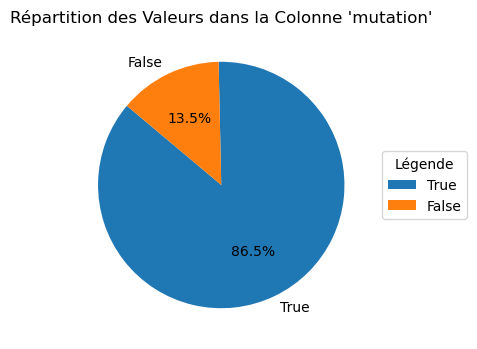

In [36]:
value_counts = df_91['mutation'].value_counts()

# Créez un diagramme circulaire
plt.figure(figsize=(4, 4))  # Facultatif : ajustez la taille du diagramme
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)

# Ajoutez un titre
plt.title("Répartition des Valeurs dans la Colonne 'mutation'")
plt.legend(title="Légende", loc="center left", bbox_to_anchor=(1, 0.5))
# Affichez le diagramme
plt.show()

Dans le dataframe, il y a 86,5% des lignes qui font parti d'une même mutation

Est ce que les mutations ont les mêmes coordonnées géographiqes ( pour le 91)

In [41]:
df_91.head()

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,code_commune,nom_commune,code_departement,id_parcelle,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,mutation
3403766,2022-1225399,2022-03-29,Vente,3300000.0,91549,Sainte-GeneviÃ¨ve-des-Bois,91,91549000AX0010,3.0,DÃ©pendance,0.0,0.0,S,sols,PDCS,Pas de Cultures Spé,1320.0,2.337825,48.63095,True
3403764,2022-1225399,2022-03-29,Vente,3300000.0,91549,Sainte-GeneviÃ¨ve-des-Bois,91,91549000AX0010,3.0,DÃ©pendance,0.0,0.0,S,sols,PDCS,Pas de Cultures Spé,1320.0,2.337825,48.63095,True
3403767,2022-1225399,2022-03-29,Vente,3300000.0,91549,Sainte-GeneviÃ¨ve-des-Bois,91,91549000AX0010,2.0,Appartement,25.0,1.0,S,sols,PDCS,Pas de Cultures Spé,1320.0,2.337825,48.63095,True
3403763,2022-1225399,2022-03-29,Vente,3300000.0,91549,Sainte-GeneviÃ¨ve-des-Bois,91,91549000AX0010,3.0,DÃ©pendance,0.0,0.0,S,sols,PDCS,Pas de Cultures Spé,1320.0,2.337825,48.63095,True
3403762,2022-1225399,2022-03-29,Vente,3300000.0,91549,Sainte-GeneviÃ¨ve-des-Bois,91,91549000AX0010,3.0,DÃ©pendance,0.0,0.0,S,sols,PDCS,Pas de Cultures Spé,1320.0,2.337825,48.63095,True


In [43]:
# Groupement par 'id_mutation' et comparaison des valeurs de 'latitude' et 'longitude'
grouped = df_91.groupby('id_mutation')
nb_diff_coord = 0 
diff_coord = [] 
for key, group in grouped:
    if (len(set(group['longitude'])) != 1) & (len(set(group['latitude'])) != 1):
        nb_diff_coord += 1 
        diff_coord.append(group)

print(nb_diff_coord)


2782


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [45]:
grouped.head()

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,code_commune,nom_commune,code_departement,id_parcelle,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,mutation
3403766,2022-1225399,2022-03-29,Vente,3300000.0,91549,Sainte-GeneviÃ¨ve-des-Bois,91,91549000AX0010,3.0,DÃ©pendance,0.0,0.0,S,sols,PDCS,Pas de Cultures Spé,1320.0,2.337825,48.630950,True
3403764,2022-1225399,2022-03-29,Vente,3300000.0,91549,Sainte-GeneviÃ¨ve-des-Bois,91,91549000AX0010,3.0,DÃ©pendance,0.0,0.0,S,sols,PDCS,Pas de Cultures Spé,1320.0,2.337825,48.630950,True
3403767,2022-1225399,2022-03-29,Vente,3300000.0,91549,Sainte-GeneviÃ¨ve-des-Bois,91,91549000AX0010,2.0,Appartement,25.0,1.0,S,sols,PDCS,Pas de Cultures Spé,1320.0,2.337825,48.630950,True
3403763,2022-1225399,2022-03-29,Vente,3300000.0,91549,Sainte-GeneviÃ¨ve-des-Bois,91,91549000AX0010,3.0,DÃ©pendance,0.0,0.0,S,sols,PDCS,Pas de Cultures Spé,1320.0,2.337825,48.630950,True
3403762,2022-1225399,2022-03-29,Vente,3300000.0,91549,Sainte-GeneviÃ¨ve-des-Bois,91,91549000AX0010,3.0,DÃ©pendance,0.0,0.0,S,sols,PDCS,Pas de Cultures Spé,1320.0,2.337825,48.630950,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422411,2022-1233484,2022-08-31,Vente,362500.0,91549,Sainte-GeneviÃ¨ve-des-Bois,91,91549000BB0246,1.0,Maison,93.0,5.0,S,sols,PDCS,Pas de Cultures Spé,402.0,2.328975,48.644448,False
3422412,2022-1233485,2022-08-25,Vente,130000.0,91479,Paray-Vieille-Poste,91,91479000AH0309,3.0,DÃ©pendance,0.0,0.0,PDC,pas de cultures,PDCS,Pas de Cultures Spé,0.0,2.354486,48.705700,True
3422417,2022-1233486,2022-08-31,Vente,4400.0,91525,Roinville,91,915250000B0336,0.0,Vide,0.0,0.0,T,terres,PDCS,Pas de Cultures Spé,605.0,2.058315,48.521021,True
3422430,2022-1233491,2022-08-18,Vente,187800.0,91114,Brunoy,91,91114000AC0232,2.0,Appartement,65.0,3.0,PDC,pas de cultures,PDCS,Pas de Cultures Spé,0.0,2.508712,48.692925,True


La reflexion final sera de grouper les lignes par mutation en regroupant les lignes. On comptera le nombre de maisons, d'appartements, de terrains vides... par mutation

In [44]:
data_91 = df_91.groupby(['id_mutation']).agg(date_mutation = ('date_mutation', 'first'),
                                             nb_elements = ('id_mutation', 'count'),
                                             nature_mutation = ('nature_mutation', 'first'),
                                             valeur_fonciere = ('valeur_fonciere', 'first'),
                                             code_commune = ('code_commune', 'first'),
                                             nom_commune = ('nom_commune', 'first'),
                                             code_departement = ('code_departement', 'first'),
                                             surface_reelle_bati = ('surface_reelle_bati', 'sum'),
                                             nombre_pieces_principales = ('nombre_pieces_principales', 'sum'),
                                             somme_terrain = ('surface_terrain', lambda x: sum(set(x))),
                                             l_surface_terrain = ('surface_terrain', set),
                                             nb_parcelles = ('id_parcelle', 'nunique'),
                                             local_maison = ('code_type_local', lambda x: (x == 1).sum()),
                                             local_appartement = ('code_type_local', lambda x: (x == 2).sum()),
                                             local_dependance = ('code_type_local', lambda x: (x == 3).sum()),
                                             local_terrain = ('code_type_local', lambda x: (x == 0).sum()),
                                             local_industriel = ('code_type_local', lambda x: (x == 4).sum()),
                                             l_code_nature_culture = ('code_nature_culture', set),
                                             l_code_nature_culture_speciale = ('code_nature_culture_speciale', set),
                                             l_code_type_local = ('code_type_local', set),
                                             l_type_local = ('type_local', set),
                                             longitude = ('longitude', 'first'),
                                             latitude = ('latitude', 'first')
                                             )

data_91.head()

,date_mutation,nb_elements,nature_mutation,valeur_fonciere,code_commune,nom_commune,code_departement,surface_reelle_bati,nombre_pieces_principales,somme_terrain,...,local_appartement,local_dependance,local_terrain,local_industriel,l_code_nature_culture,l_code_nature_culture_speciale,l_code_type_local,l_type_local,longitude,latitude
id_mutation,,,,,,,,,,,,,,,,,,,,,
2022-1217902,2022-01-05,2,Vente,179000.0,91228,Ã‰vry-Courcouronnes,91,39.0,2.0,0.0,...,1,1,0,0,{PDC},{PDCS},"{2.0, 3.0}","{Appartement, DÃ©pendance}",2.424442,48.625758
2022-1217903,2022-01-04,2,Vente,135000.0,91386,Mennecy,91,41.0,2.0,0.0,...,1,1,0,0,{PDC},{PDCS},"{2.0, 3.0}","{DÃ©pendance, Appartement}",2.438172,48.574565
2022-1217904,2022-01-04,2,Vente,264000.0,91521,Ris-Orangis,91,65.0,4.0,290.0,...,0,1,0,0,{S},{PDCS},"{1.0, 3.0}","{Maison, DÃ©pendance}",2.412237,48.647736
2022-1217905,2022-01-04,3,Vente,242200.0,91174,Corbeil-Essonnes,91,87.0,4.0,0.0,...,1,2,0,0,{PDC},{PDCS},"{2.0, 3.0}","{DÃ©pendance, Appartement}",2.481472,48.599042
2022-1217906,2022-01-03,2,Vente,125000.0,91174,Corbeil-Essonnes,91,36.0,2.0,0.0,...,1,1,0,0,{PDC},{PDCS},"{2.0, 3.0}","{Appartement, DÃ©pendance}",2.475774,48.584671


In [46]:
data_91['prix_p_mc_bati'] =  data_91['valeur_fonciere']/data_91['surface_reelle_bati']

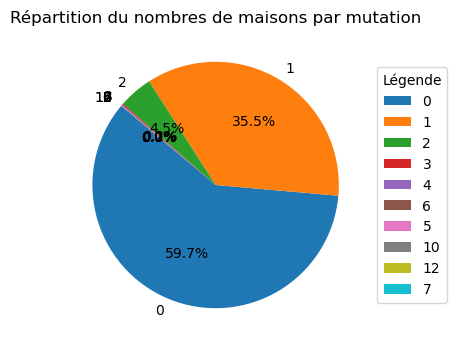

In [47]:
value_counts = data_91['local_maison'].value_counts()

# Créez un diagramme circulaire
plt.figure(figsize=(4, 4))  
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)

# Ajoutez un titre
plt.title("Répartition du nombres de maisons par mutation")
plt.legend(title="Légende", loc="center left", bbox_to_anchor=(1, 0.5))
# Affichez le diagramme
plt.show()

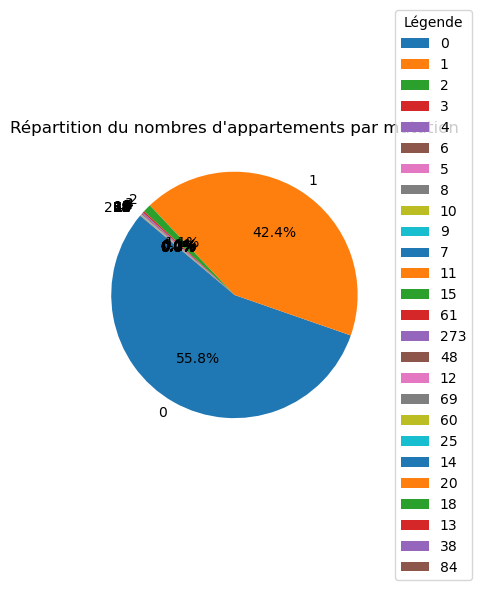

In [48]:
value_counts = data_91['local_appartement'].value_counts()

# Créez un diagramme circulaire
plt.figure(figsize=(4, 4))  
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)

# Ajoutez un titre
plt.title("Répartition du nombres d'appartements par mutation")
plt.legend(title="Légende", loc="center left", bbox_to_anchor=(1, 0.5))
# Affichez le diagramme
plt.show()

On se focalisera sur les mutation contenant qu'une seule maison et celles contenant qu'un seul appartement

In [49]:
data_91_maisons = data_91[(data_91['local_maison'] == 1) & (data_91['local_appartement'] == 0)]
data_91_appartements = data_91[(data_91['local_appartement'] == 1) & (data_91['local_maison'] == 0)]

In [50]:
data_91_maisons.shape

(7117, 24)

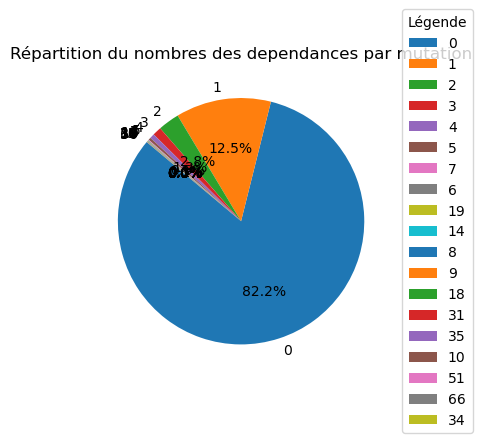

In [51]:
value_counts = data_91_maisons['local_terrain'].value_counts()

# Créez un diagramme circulaire
plt.figure(figsize=(4, 4))  
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)

# Ajoutez un titre
plt.title("Répartition du nombres des dependances par mutation")
plt.legend(title="Légende", loc="center left", bbox_to_anchor=(1, 0.5))
# Affichez le diagramme
plt.show()

Affichage du prix moyen au mètre carré des maisons et des appartements par ville du 91

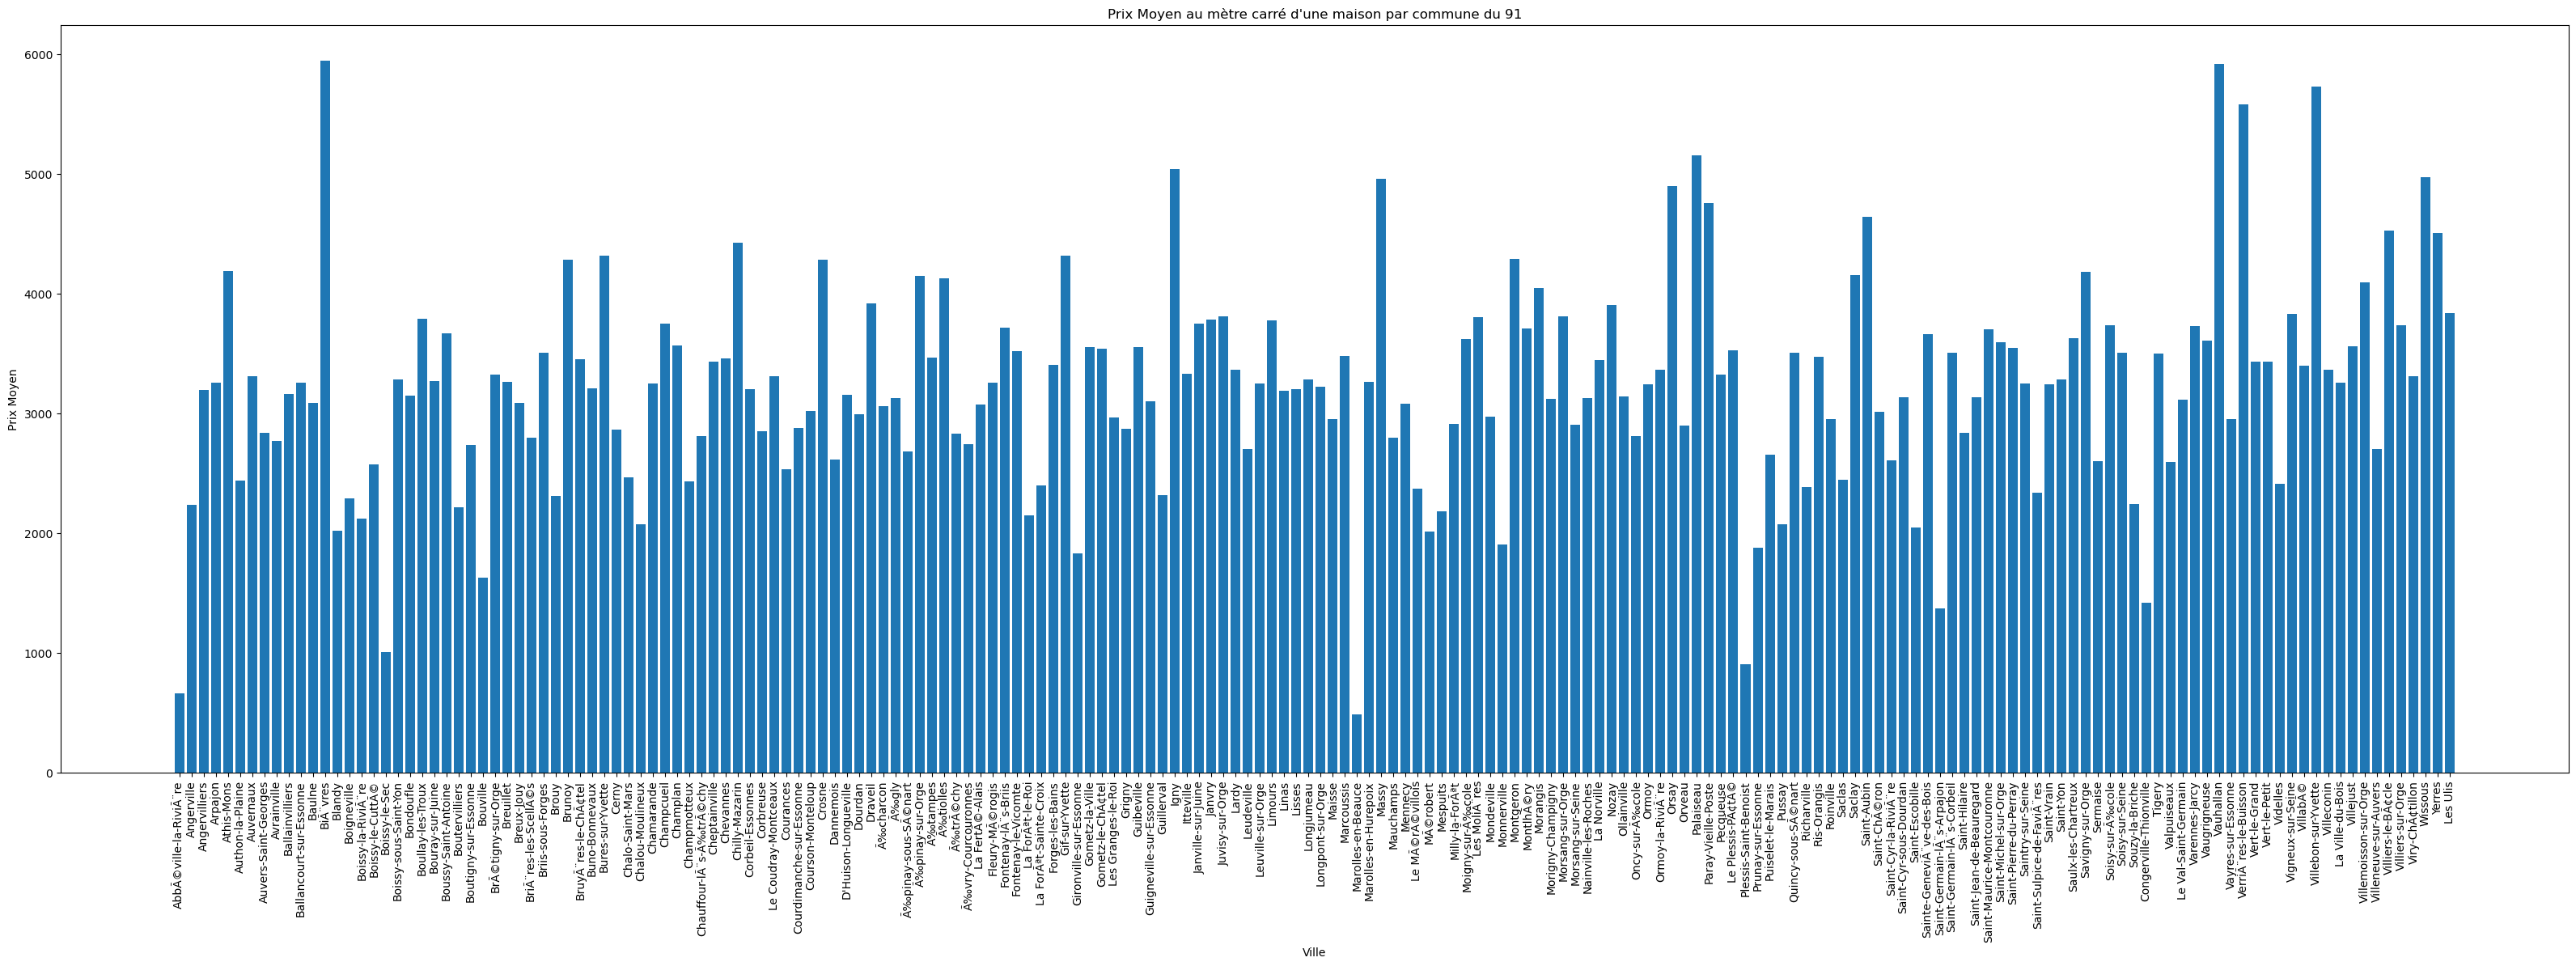

In [52]:
data_91_maisons = data_91_maisons.sort_values(by='code_commune')

prix_ville = data_91_maisons.groupby('code_commune')['valeur_fonciere'].sum()
mcarre_ville = data_91_maisons.groupby('code_commune')['surface_reelle_bati'].sum()
ville = data_91_maisons['nom_commune'].unique()
codepost = data_91_maisons['code_commune'].unique()

prix_mcarr_ville = pd.DataFrame({'nom_ville': ville,
                                 'code_postal' : codepost,
                                 'prix_ville': prix_ville.values,
                                 'surface_ville' : mcarre_ville.values
                                })

prix_mcarr_ville['prix_mcarr'] = prix_mcarr_ville['prix_ville']/prix_mcarr_ville['surface_ville']

plt.figure(figsize=(40, 12))
# Créer le graphe en barres
plt.bar(x = prix_mcarr_ville['nom_ville'],
        height = prix_mcarr_ville['prix_mcarr'])

# Personnaliser le graphe
plt.xticks(rotation=90)
plt.title("Prix Moyen au mètre carré d'une maison par commune du 91")
plt.xlabel('Ville')
plt.ylabel('Prix Moyen')

# Afficher le graphe
plt.show()

In [53]:
prix_mcarr_ville

,nom_ville,code_postal,prix_ville,surface_ville,prix_mcarr
0,AbbÃ©ville-la-RiviÃ¨re,91001,50000.00,76.0,657.894737
1,Angerville,91016,11406010.00,5103.0,2235.157750
2,Angervilliers,91017,4397120.00,1376.0,3195.581395
3,Arpajon,91021,13987730.00,4293.0,3258.264617
4,Athis-Mons,91027,43648105.25,10428.0,4185.664101
...,...,...,...,...,...
183,Villiers-sur-Orge,91685,10711322.00,2866.0,3737.376832
184,Viry-ChÃ¢tillon,91687,48504959.50,14666.0,3307.306662
185,Wissous,91689,15055955.00,3028.0,4972.244055
186,Yerres,91691,69387616.00,15410.0,4502.765477


In [54]:
prix_mcarr_ville=prix_mcarr_ville[['nom_ville', 'code_postal', 'prix_mcarr']]

nom_fichier = r'../data/prixm2maisons91.csv'
prix_mcarr_ville.to_csv(nom_fichier, index=False)

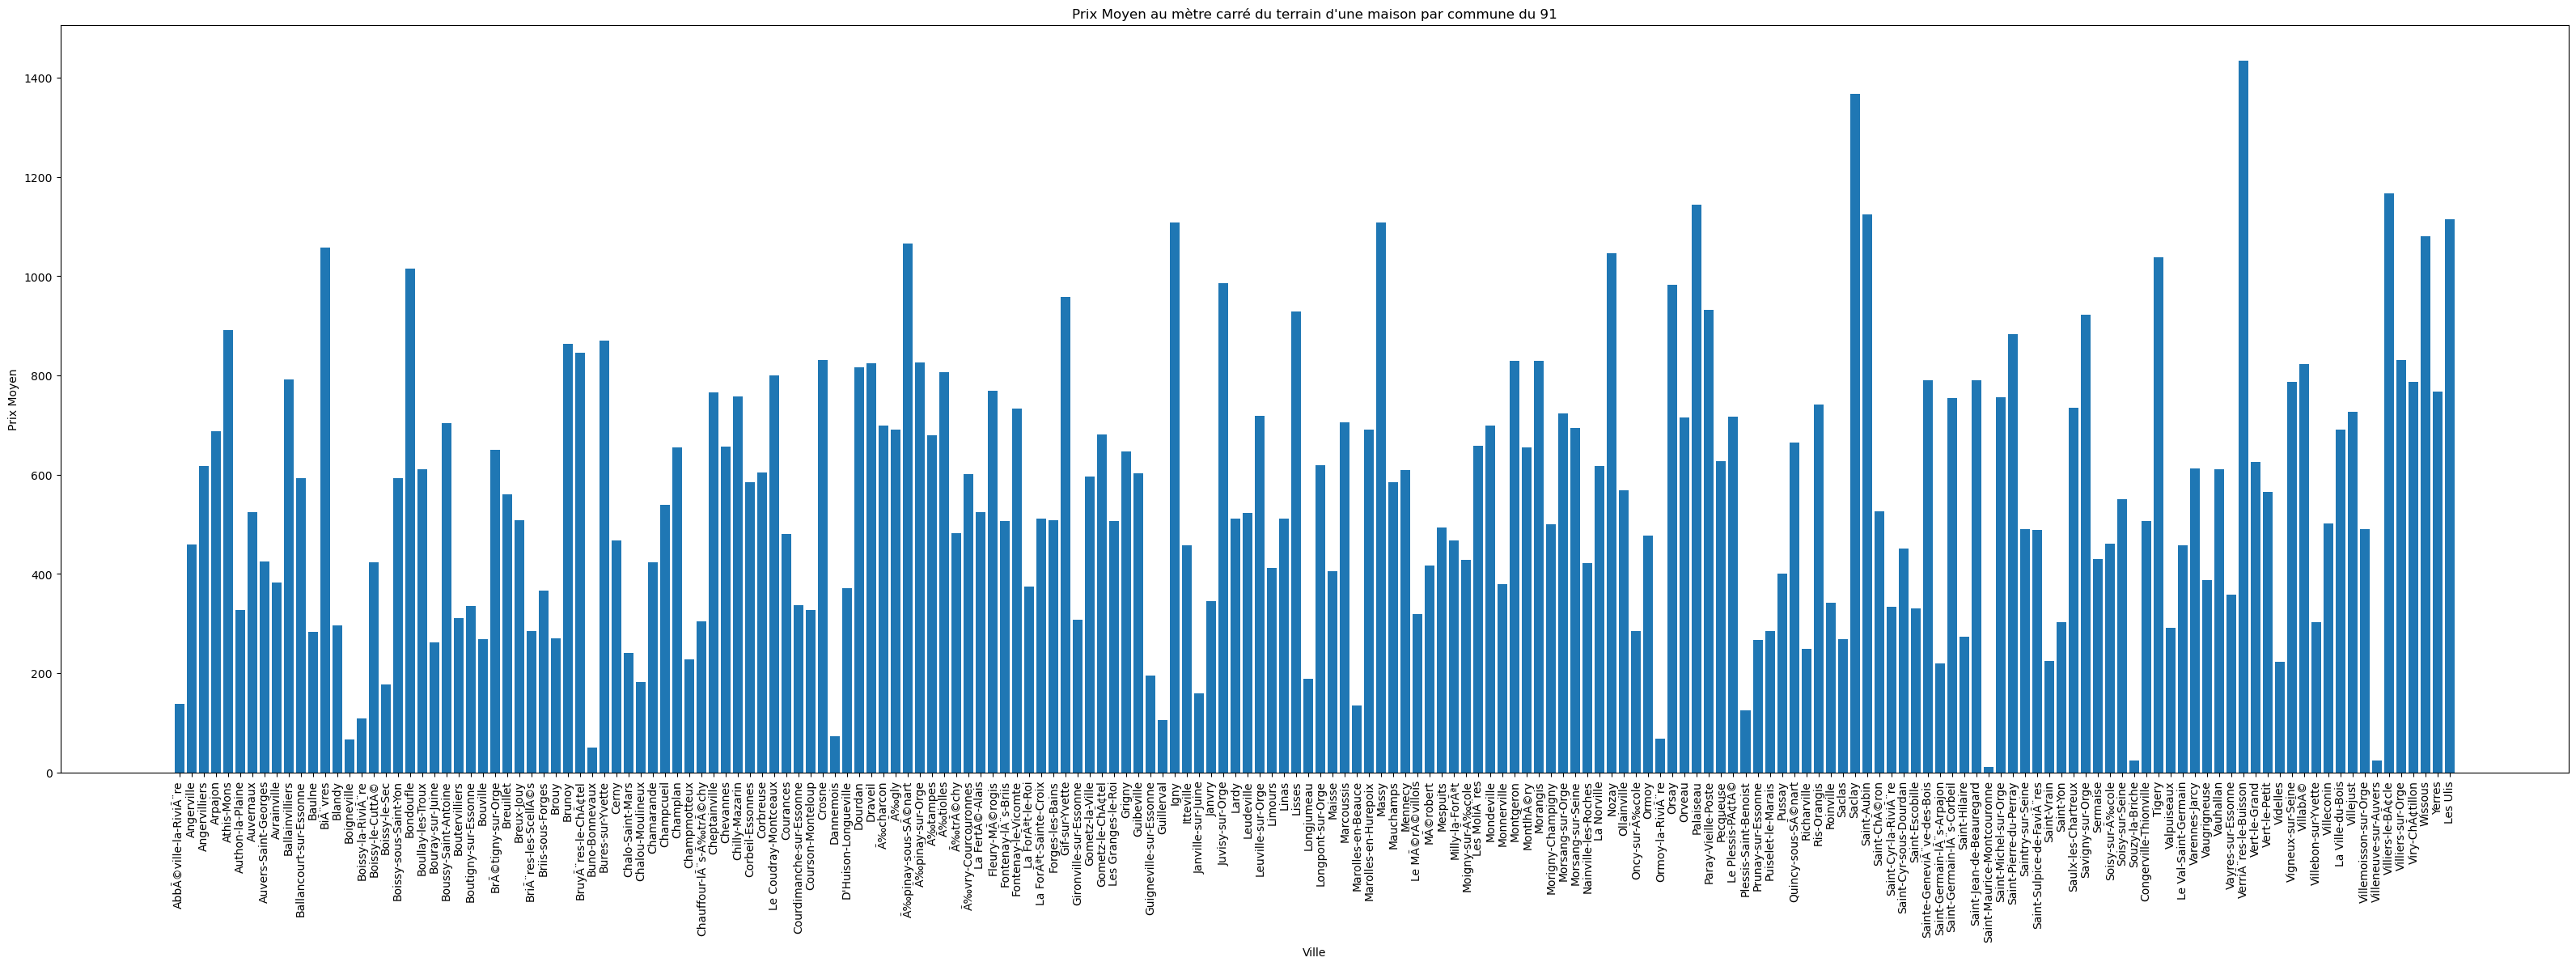

In [55]:
prix_ville = data_91_maisons.groupby('code_commune')['valeur_fonciere'].sum()
mcarre_ville = data_91_maisons.groupby('code_commune')['somme_terrain'].sum()
ville = data_91_maisons['nom_commune'].unique()

prix_mcarr_ville = pd.DataFrame({'nom_ville': ville, 
                                 'prix_ville': prix_ville.values,
                                 'surface_ville' : mcarre_ville.values
                                })

prix_mcarr_ville['prix_mcarr'] = prix_mcarr_ville['prix_ville']/prix_mcarr_ville['surface_ville']

plt.figure(figsize=(40, 12))
# Créer le graphe en barres
plt.bar(x = prix_mcarr_ville['nom_ville'],
        height = prix_mcarr_ville['prix_mcarr'])

# Personnaliser le graphe
plt.xticks(rotation=90)
plt.title("Prix Moyen au mètre carré du terrain d'une maison par commune du 91")
plt.xlabel('Ville')
plt.ylabel('Prix Moyen')

# Afficher le graphe
plt.show()

In [56]:
prix_mcarr_ville = prix_mcarr_ville[['nom_ville', 'prix_mcarr']]

In [57]:
prix_mcarr_ville 

,nom_ville,prix_mcarr
0,AbbÃ©ville-la-RiviÃ¨re,137.741047
1,Angerville,459.623227
2,Angervilliers,617.746558
3,Arpajon,687.222659
4,Athis-Mons,891.014050
...,...,...
183,Villiers-sur-Orge,831.043681
184,Viry-ChÃ¢tillon,786.932728
185,Wissous,1080.519234
186,Yerres,768.276009


In [58]:
data_91_appartements.shape

(8527, 24)

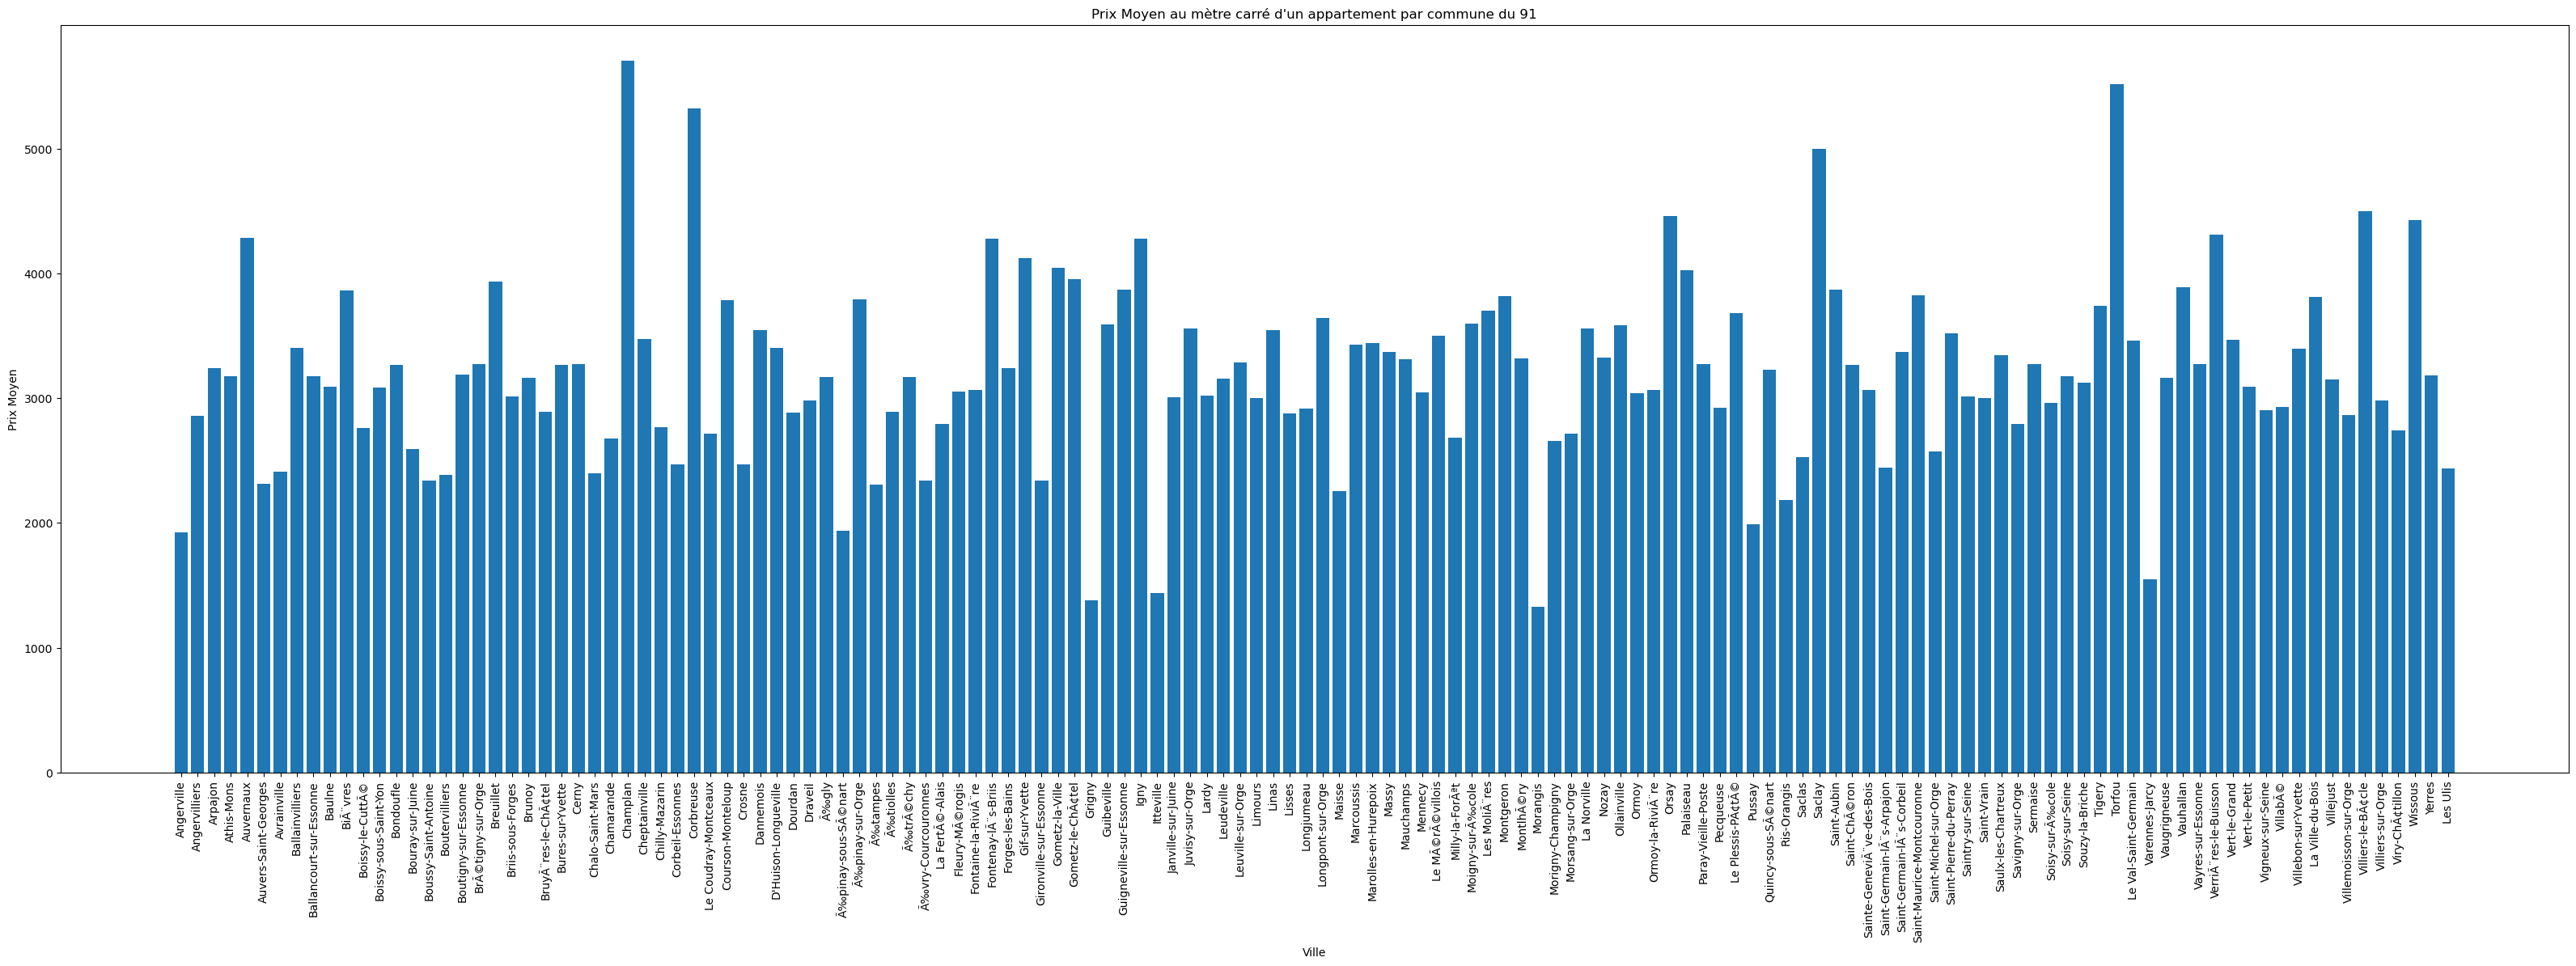

In [59]:
data_91_appartements = data_91_appartements.sort_values(by='code_commune')

prix_ville = data_91_appartements.groupby('code_commune')['valeur_fonciere'].sum()
mcarre_ville = data_91_appartements.groupby('code_commune')['surface_reelle_bati'].sum()
ville = data_91_appartements['nom_commune'].unique()
codepost = data_91_appartements['code_commune'].unique()

prix_mcarr_ville = pd.DataFrame({'nom_ville': ville,
                                 'code_postal' : codepost,
                                 'prix_ville': prix_ville.values,
                                 'surface_ville' : mcarre_ville.values
                                })

prix_mcarr_ville['prix_mcarr'] = prix_mcarr_ville['prix_ville']/prix_mcarr_ville['surface_ville']

plt.figure(figsize=(40, 12))
# Créer le graphe en barres
plt.bar(x = prix_mcarr_ville['nom_ville'],
        height = prix_mcarr_ville['prix_mcarr'])

# Personnaliser le graphe
plt.xticks(rotation=90)
plt.title("Prix Moyen au mètre carré d'un appartement par commune du 91")
plt.xlabel('Ville')
plt.ylabel('Prix Moyen')

# Afficher le graphe
plt.show()

In [60]:
prix_mcarr_ville=prix_mcarr_ville[['nom_ville', 'code_postal', 'prix_mcarr']]

nom_fichier = r'../data/prixm2appartements91.csv'
prix_mcarr_ville.to_csv(nom_fichier, index=False)

## Conclusion

Ce premier notebook permet la construction de la fonction que nous retrouvons dans le prochain notebook *Etude des évolutions des prix dans le 91* qui nous permettra de comparer les biens vendus lors de différentes années données par le site Gouv-Immo. 
Cette reflexion se porte sur le 91, mais peut très bien se faire sur d'autres départements. 

## Test suite du projet: Trouver les logements les plus proches pour estimer un prix au m²


In [69]:
data_91_appartements = data_91_appartements.reset_index(drop=True)

# Affichez le DataFrame résultant
print(data_91_appartements)

     date_mutation  nb_elements nature_mutation  valeur_fonciere code_commune  \
0       2022-10-27            2           Vente         150000.0        91016   
1       2022-05-10            2           Vente          52000.0        91016   
2       2022-09-16            2           Vente         132000.0        91016   
3       2022-09-20            2           Vente         137000.0        91016   
4       2022-02-10            1           Vente          81000.0        91016   
...            ...          ...             ...              ...          ...   
8522    2022-09-16            3           Vente         135000.0        91692   
8523    2022-03-10            2           Vente         185000.0        91692   
8524    2022-12-12            3           Vente         162000.0        91692   
8525    2022-05-31            2           Vente         125000.0        91692   
8526    2022-11-16            2           Vente         145000.0        91692   

     nom_commune  code_depa

In [72]:
from scipy.spatial import cKDTree


# Créez un arbre spatial KDTree à partir des données de latitude et de longitude
tree = cKDTree(data_91_appartements[['latitude', 'longitude']])

# Fonction pour trouver les 3 lignes les plus proches et récupérer les informations de la colonne "prix_p_mc_bati"
def trouver_plus_proches_lignes(row, df):
    distances, indices = tree.query([row['latitude'], row['longitude']], k=4)  # k=4 pour obtenir les 3 plus proches + la ligne elle-même
    plus_proches_lignes = df.iloc[indices[1:]]  # Exclure la ligne elle-même
    return plus_proches_lignes['prix_p_mc_bati'].values

# Appliquez la fonction pour chaque ligne du DataFrame
data_91_appartements['Plus_Proches'] = data_91_appartements.apply(lambda row: trouver_plus_proches_lignes(row, data_91_appartements), axis=1)




IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [77]:
data_91_appartements = data_91_appartements.reset_index(drop=True)

# Créez trois nouvelles colonnes pour stocker les informations des trois lignes les plus proches
data_91_appartements[['Plus_Proche_1', 'Plus_Proche_2', 'Plus_Proche_3']] = pd.DataFrame(data_91_appartements['Plus_Proches'].tolist())

# Supprimez la colonne intermédiaire 'Plus_Proches'
data_91_appartements.drop('Plus_Proches', axis=1, inplace=True)

# Affichez le DataFrame résultant
print(data_91_appartements)

     date_mutation  nb_elements nature_mutation  valeur_fonciere code_commune  \
0       2022-10-27            2           Vente         150000.0        91016   
1       2022-05-10            2           Vente          52000.0        91016   
2       2022-09-16            2           Vente         132000.0        91016   
3       2022-09-20            2           Vente         137000.0        91016   
4       2022-02-10            1           Vente          81000.0        91016   
...            ...          ...             ...              ...          ...   
8522    2022-09-16            3           Vente         135000.0        91692   
8523    2022-03-10            2           Vente         185000.0        91692   
8524    2022-12-12            3           Vente         162000.0        91692   
8525    2022-05-31            2           Vente         125000.0        91692   
8526    2022-11-16            2           Vente         145000.0        91692   

     nom_commune  code_depa

In [78]:
data_91_appartements.head()

,date_mutation,nb_elements,nature_mutation,valeur_fonciere,code_commune,nom_commune,code_departement,surface_reelle_bati,nombre_pieces_principales,somme_terrain,...,l_code_nature_culture,l_code_nature_culture_speciale,l_code_type_local,l_type_local,longitude,latitude,prix_p_mc_bati,Plus_Proche_1,Plus_Proche_2,Plus_Proche_3
0,2022-10-27,2,Vente,150000.0,91016,Angerville,91,80.0,3.0,0.0,...,{PDC},{PDCS},"{2.0, 3.0}","{Appartement, DÃ©pendance}",1.991374,48.317805,1875.000000,2538.461538,1611.764706,1485.714286
1,2022-05-10,2,Vente,52000.0,91016,Angerville,91,35.0,3.0,61.0,...,{S},{PDCS},"{0.0, 2.0}","{Vide, Appartement}",1.998950,48.311094,1485.714286,2314.285714,1611.764706,2538.461538
2,2022-09-16,2,Vente,132000.0,91016,Angerville,91,52.0,2.0,0.0,...,{PDC},{PDCS},"{2.0, 3.0}","{Appartement, DÃ©pendance}",1.999966,48.314096,2538.461538,1611.764706,1485.714286,2314.285714
3,2022-09-20,2,Vente,137000.0,91016,Angerville,91,85.0,3.0,0.0,...,{PDC},{PDCS},"{2.0, 3.0}","{Appartement, DÃ©pendance}",1.999966,48.314096,1611.764706,1611.764706,1485.714286,2314.285714
4,2022-02-10,1,Vente,81000.0,91016,Angerville,91,35.0,2.0,0.0,...,{PDC},{PDCS},{2.0},{Appartement},1.998827,48.310925,2314.285714,1485.714286,1611.764706,2538.461538


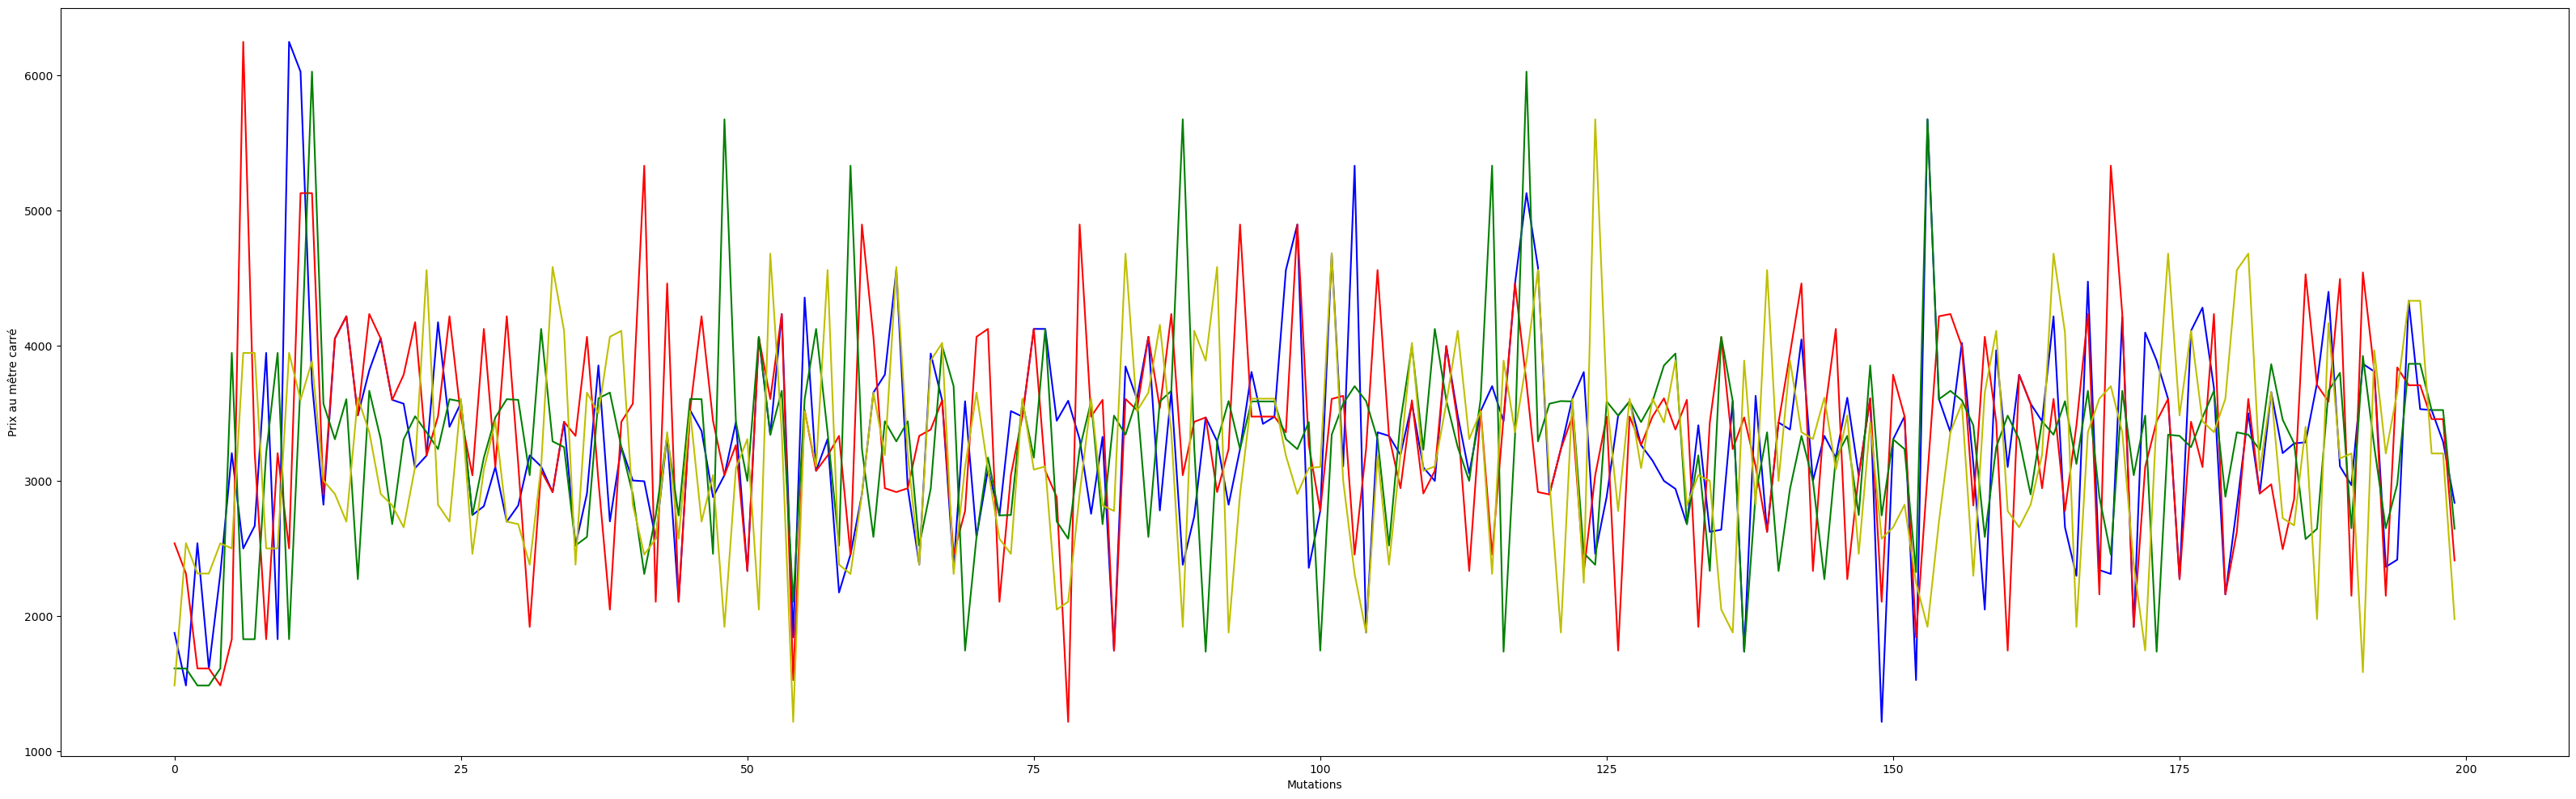

In [87]:
plt.figure(figsize=(40, 12))

plt.plot(data_91_appartements['prix_p_mc_bati'][:200], color = 'b')
plt.plot(data_91_appartements['Plus_Proche_1'][:200], color = 'r')
plt.plot(data_91_appartements['Plus_Proche_2'][:200], color = 'g')
plt.plot(data_91_appartements['Plus_Proche_3'][:200], color = 'y')
# Ajoutez des étiquettes aux axes
plt.xlabel('Mutations')
plt.ylabel('Prix au mêtre carré')

# Affichez le graphique
plt.show()

In [79]:
nom_fichier = r'../data/df_91_appartement_avec_3_proches_2022.csv'
data_91_appartements.to_csv(nom_fichier, index=False)